In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib as plt
from pandas_datareader import data as wb

In [ ]:
magalu = yf.download("MGLU3.SA", start= "2010-01-01", end="2021-01-01")

In [ ]:
magalu.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-02,0.503125,0.518750,0.503125,0.514062,0.463173,280003200
2011-05-03,0.515625,0.521562,0.506250,0.509375,0.458950,33670400
2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464018,39203200
2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461202,35097600
2011-05-06,0.510937,0.511875,0.500000,0.508125,0.457824,38672000


In [ ]:
magalu.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-22,25.290001,25.420000,24.850000,25.160000,25.115610,25236200
2020-12-23,25.250000,25.629999,24.969999,24.969999,24.925945,20558600
2020-12-28,24.780001,25.330000,24.400000,25.250000,25.205452,23099100
2020-12-29,25.230000,25.559999,25.020000,25.280001,25.235399,17789700
2020-12-30,25.370001,25.660000,24.950001,24.950001,24.931921,19188700


In [ ]:
magalu['Retorno Simples'] = (magalu['Adj Close']/magalu['Adj Close'].shift(1)) - 1
print(magalu['Retorno Simples'])

Date
2011-05-02         NaN
2011-05-03   -0.009118
2011-05-04    0.011043
2011-05-05   -0.006068
2011-05-06   -0.007326
                ...   
2020-12-22    0.006400
2020-12-23   -0.007552
2020-12-28    0.011213
2020-12-29    0.001188
2020-12-30   -0.012026
Name: Retorno Simples, Length: 2394, dtype: float64


<h3>Gráfico do retorno percentual diário MGLU3.SA (2011 - 2020):</h3>

---



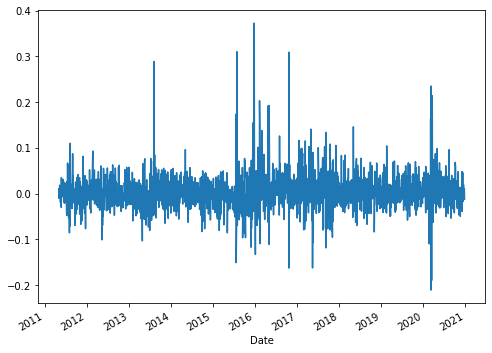

In [ ]:
magalu['Retorno Simples'].plot(figsize=(8,6))

<h3>Retornos médio diário e anual no período:</h3>

In [ ]:
retornoMedioDiario = magalu['Retorno Simples'].mean()
retornoMedioDiario

0.0023590517951680963

In [ ]:
retornoMedioAnual = magalu['Retorno Simples'].mean()*250
retornoMedioAnual

0.5897629487920241

Criando o vetor de logaritmos do Retorno:

In [ ]:
magalu['Retorno Log'] = np.log(magalu['Adj Close'] / magalu['Adj Close'].shift(1))
magalu['Retorno Log'].tail()

Date
2020-12-22    0.006380
2020-12-23   -0.007580
2020-12-28    0.011151
2020-12-29    0.001187
2020-12-30   -0.012099
Name: Retorno Log, dtype: float64

<h3>Variação logaritmica MGLU3.SA:</h3>

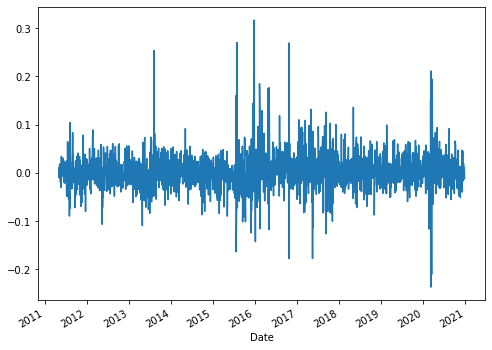

In [ ]:
magalu['Retorno Log'].plot(figsize = (8,6))

In [ ]:
indices = yf.download("^GSPC ^BVSP", start="1995-01-03", end="2021-01-01")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
indices.head()

,^BVSP,^GSPC
Date,,
1995-01-03,4098.000000,459.109985
1995-01-04,3967.899902,460.709991
1995-01-05,4036.699951,460.339996
1995-01-06,3827.399902,460.679993
1995-01-09,3627.800049,460.829987


<h3>Gráfico de Variação IBOV E S&P 500, 1995-2021</h3>

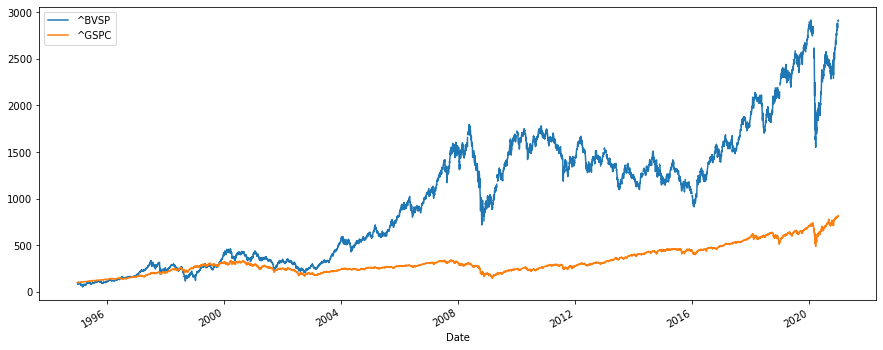

In [ ]:
(indices/indices.iloc[0]*100).plot(figsize=(15,6))

In [ ]:
retornoIndice = (indices/indices.shift(1))-1
retornoIndice.head()

,^BVSP,^GSPC
Date,,
1995-01-03,NaN,NaN
1995-01-04,-0.031747,0.003485
1995-01-05,0.017339,-0.000803
1995-01-06,-0.051849,0.000739
1995-01-09,-0.052150,0.000326


In [ ]:
dados = yf.download("MGLU3.SA ^GSPC ^BVSP", start="2017-01-03", end="2021-01-01")['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
dados.head()

,MGLU3.SA,^BVSP,^GSPC
Date,,,
2017-01-03,0.378047,61814.0,2257.830078
2017-01-04,0.357915,61589.0,2270.750000
2017-01-05,0.370218,62071.0,2269.000000
2017-01-06,0.367832,61665.0,2276.979980
2017-01-09,0.351092,61700.0,2268.899902


<h3>Gráfico comparativo MGLU3.SA x Índices IBOVESPA e S&P500 (2017 - 2020)</h3>

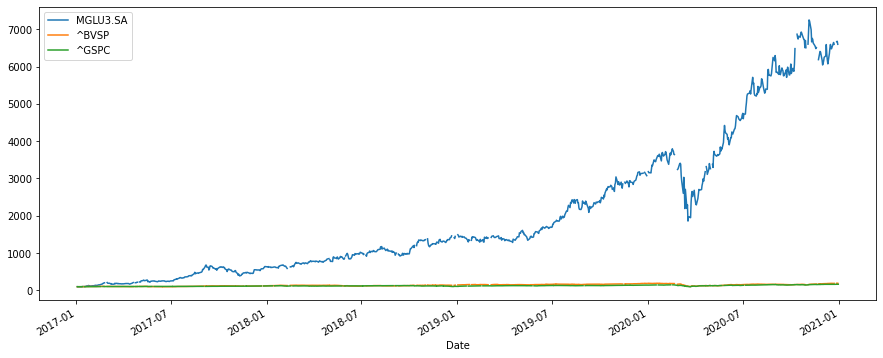

In [ ]:
(dados/dados.iloc[0]*100).plot(figsize=(15,6))

A ação da Magazine Luiza destoa amplamente do índice de ações americano S&P 500 e do próprio índice que a contém, o IBOVESPA, apresentando assim um grande retorno relativo no período analisado.

OBS.: Usei os dados a partir de 2017 pois no período anterior os valores relativos da ação eram nulos.